In [1]:
#imports
import pandas as pd
import numpy as np
import os
from sklearn import metrics, preprocessing, linear_model

# fixing the randomically 
np.random.seed(0)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dataLimpS2.csv


In [2]:
#reading data
data = pd.read_csv('../input/dataLimpS2.csv', header=0, delimiter=",", decimal=",", thousands=',')


In [3]:
data.dtypes

Grau                                        float64
Temp_Liquid                                 float64
MgO saturação                               float64
SiO2                                        float64
S                                           float64
P2O5                                        float64
Mno                                         float64
MgO                                         float64
FeO                                         float64
Fet                                         float64
CaO                                         float64
BAS                                         float64
Al2O3                                       float64
Peso real gusa                              float64
Temperatura real gusa                       float64
% S gusa                                    float64
% P gusa                                    float64
% Si gusa                                   float64
% Mn gusa                                   float64
% Gusa Carga

In [4]:
data = data[data['% Gusa Carga'] != 'Calc Failed']

In [5]:
data['% Gusa Carga'] = data['% Gusa Carga'].str.replace(',', '').astype(float)

In [6]:
data = data.dropna()

In [7]:
# transforma o CSV em numpy
features = [f for f in list(data) if not "y" in f]
X = data[features]
y = data['y']

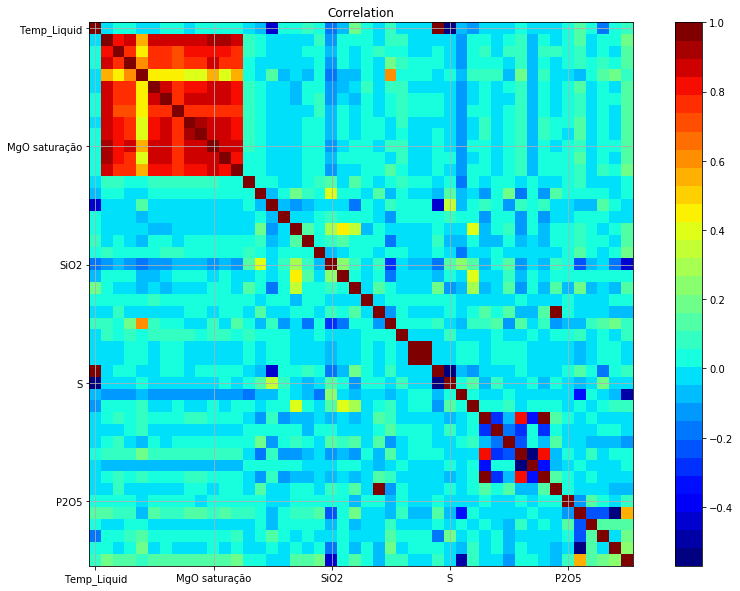

In [8]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
   
    fig =  plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=features
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    
    fig.colorbar(cax)
    plt.show()

correlation_matrix(X)

In [9]:
# exibe quantidade de amostras e atributos
print(X.shape)
print(y.shape)

(1476, 46)
(1476,)


In [10]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

knn2 = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)

In [11]:
# comparando com gabarito
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred2)

0.09255079006772009

In [12]:
# uma forma automática de StandardScaler + KNN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [13]:
# utiliza-se GridSearchCV para achar os melhores parâmetros
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
parameters = {'clf__n_neighbors': [1,2,3,4,5],'clf__algorithm':['brute','ball_tree']} # quais parâmetros e quais valores serão testados
clf = GridSearchCV(pipeline, parameters, cv=3, iid=False) # clf vai armazenar qual foi a melhor configuração
clf.fit(X_train2,y_train2)
print(clf.best_estimator_)
# utilizando validação cruzada para avaliar o modelo
scores = cross_val_score(clf, X_test2, y_test2, cv=5)

print('Accuracy : %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of 

Accuracy : 10.36 +- 0.80


In [14]:
#validação cruzada generica usando varios algoritimos usando a accuracia
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
import time

In [15]:
# escalando os dados
scaler = preprocessing.StandardScaler()
Xescalado = scaler.fit_transform(X)
X_trainX, X_testX, y_trainY, y_testY= model_selection.train_test_split(Xescalado, y, test_size=0.1, random_state=42)

In [16]:
#criando os modelos
modelos = []
modelos.append(('SVM', svm.SVC()))
modelos.append(('LogR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))

In [17]:
#ignora né, warnings servem pra serem ignorados sempre.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [18]:
resultados = []
nomes = []
#executa o loop e a cross validação kfold
for nome, modelo in modelos:
    tini = time.time()
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(modelo, X_trainX, y_trainY, cv=kfold, scoring='accuracy')
    tpass = time.time() - tini
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "{:3.2f} ({:3.2f})  Tpass: {:6.2f}".format((cv_results.mean()*100), (cv_results.std()*100), tpass)
    msg = "%s "%(nome) + msg
    print(msg)

SVM 14.76 (2.30)  Tpass:   3.76
LogR 14.53 (2.45)  Tpass:   5.76
LDA 14.16 (1.74)  Tpass:   0.20
KNN 10.32 (2.74)  Tpass:   0.22
CART 10.40 (2.27)  Tpass:   0.60
NB 5.57 (1.03)  Tpass:   0.05


In [19]:
# exibe quantidade de amostras e atributos
print(X_trainX.shape)
print(y_trainY.shape)


X_testX.shape

(1328, 46)
(1328,)


(148, 46)

In [20]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.optimizers import SGD,RMSprop

# Generate dummy data
# x_train = np.random.random((100, 100, 100, 3))
# y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
# x_test = np.random.random((20, 100, 100, 3))
# y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)


Using TensorFlow backend.


In [21]:
x_train = X_trainX.reshape(1328,46,1)
x_test = X_testX.reshape(148,46,1)
y_train = y_trainY
y_test = y_testY

In [22]:
verbose, epochs, batch_size = 0, 10, 16

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1,kernel_initializer='normal', activation='relu', input_shape=(46,1)))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile( loss='binary_crossentropy',optimizer='sgd', metrics=['accuracy'])
# fit network

# evaluate model
history = model.fit(x_train, y_train, validation_split=0.2,epochs= epochs, batch_size= batch_size, verbose=0)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 46, 64)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 46, 64)            4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1472)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                29460     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total para

In [23]:
model.evaluate(x_test, y_test)

148/148 [==============================] - 0s 72us/step


[-2058506592.8648648, 0.0]

In [24]:
y_pred[0]

NameError: name 'y_pred' is not defined

In [25]:
for i in y_trainY:
    print(i)

149999997.0
149999997.0
120000001.0
170000009.0
130000003.0
120000001.0
170000009.0
149999997.0
130000003.0
99999998.0
219999999.0
109999999.0
170000009.0
109999999.0
199999996.0
140000004.0
140000004.0
120000001.0
109999999.0
160000008.0
120000001.0
109999999.0
99999998.0
130000003.0
189999994.0
120000001.0
109999999.0
160000008.0
170000009.0
140000004.0
160000008.0
189999994.0
130000003.0
170000009.0
149999997.0
109999999.0
0.0
140000004.0
189999994.0
170000009.0
179999992.0
170000009.0
120000001.0
149999997.0
140000004.0
0.0
170000009.0
130000003.0
149999997.0
120000001.0
140000004.0
160000008.0
199999996.0
120000001.0
170000009.0
170000009.0
70000002.0
120000001.0
140000004.0
120000001.0
120000001.0
209999997.0
120000001.0
140000004.0
120000001.0
89999996.0
120000001.0
80000004.0
160000008.0
140000004.0
120000001.0
160000008.0
109999999.0
130000003.0
130000003.0
149999997.0
170000009.0
160000008.0
140000004.0
219999999.0
99999998.0
99999998.0
120000001.0
99999998.0
179999992.0
1099

In [26]:
model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(46,)),
    Dense(64, activation='relu'),
    Dense(1),
])

optimizer = RMSprop(0.001)
model_2.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
hist_2 = model_2.fit(X_trainX, y_trainY,
          batch_size=32, epochs=100,
          validation_data=(X_testX, y_testY))

Train on 1328 samples, validate on 148 samples
Epoch 1/100
1328/1328 [==============================] - 0s 207us/step - loss: 18995030216127992.0000 - mean_absolute_error: 130783130.7952 - mean_squared_error: 18995030216127992.0000 - val_loss: 18387159910923844.0000 - val_mean_absolute_error: 129121613.6216 - val_mean_squared_error: 18387159910923844.0000
Epoch 2/100
1328/1328 [==============================] - 0s 38us/step - loss: 18995025351948168.0000 - mean_absolute_error: 130783114.9880 - mean_squared_error: 18995025351948168.0000 - val_loss: 18387154019853836.0000 - val_mean_absolute_error: 129121590.0541 - val_mean_squared_error: 18387154019853836.0000
Epoch 3/100
1328/1328 [==============================] - 0s 37us/step - loss: 18995016826696812.0000 - mean_absolute_error: 130783087.0361 - mean_squared_error: 18995016826696812.0000 - val_loss: 18387142876154908.0000 - val_mean_absolute_error: 129121556.9730 - val_mean_squared_error: 18387142876154908.0000
Epoch 4/100
1328/1328 

In [27]:
hist = pd.DataFrame(hist_2.history)


In [28]:
loss, mae, mse = model_2.evaluate(X_testX, y_testY, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

Testing set Mean Abs Error: 128223074.59 


In [29]:
model_2.predict_proba(X_testX)[145]

array([506812.], dtype=float32)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


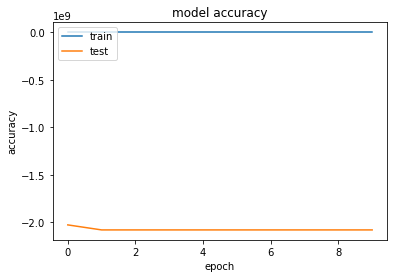

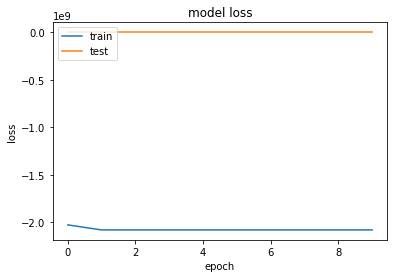

In [30]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()